In [22]:
import numpy as np
import pandas as pd
import sympy as sym
from scipy import constants
import matplotlib.pyplot as plt

In [43]:
def Search4Max(df,vecref):
    for i in range(len(df["Gray_Value"])):
        if df["Gray_Value"][i] == np.max(vecref):
            maxin = i
    return maxin

def lenght_between(dlambda, dpixels, pixels):
    return (dlambda/dpixels)*pixels

def build_line(x, y):
    factor = (y[1] - y[0])/(x[1] - x[0])
    weight = y[1] - factor*x[1]
    return factor, weight

def transform(x, y, px):
    m, b = build_line(x, y)
    return m*px + b

In [209]:
path = "C:/Users/Darck/Modern_Phy_Lab/4 Efecto Zeeman/data/CSV/"

# Información relativa al Cadmio:
Cadmium_parallel = pd.read_csv(path + "Cd_conB_paral_10s.csv")
Cadmium_perpend = pd.read_csv(path + "Cd_conB_perp_10s.csv")
Neon_Cadmium = pd.read_csv(path + "Calib_NeCd_10s.csv")

axis = Cadmium_perpend["Distance_(pixels)"].to_numpy()

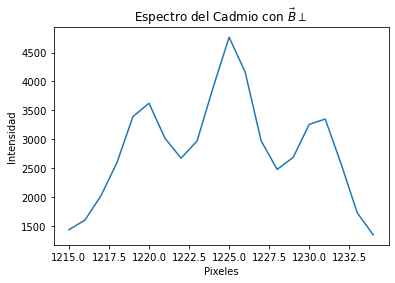

In [249]:
init, final = 1215, 1235
Cd_perpend = Cadmium_perpend["Gray_Value"].to_numpy()[init:final]

plt.plot(axis[init:final], Cd_perpend)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title(r"Espectro del Cadmio con $\vec{B} \perp$")
plt.savefig("Cadmio_Perp.pdf")

In [250]:
px_sigma1, px_pi, px_sigma2 = 1220, 1225, 1231

In [271]:
Cd_line = 643.847e-9 # metros
Ne_line = 640.2248e-9 # metros
NeCd = Neon_Cadmium["Gray_Value"].to_numpy()
Cd_perpend

array([1440, 1606, 2027, 2599, 3395, 3623, 3018, 2676, 2972, 3894, 4764,
       4164, 2975, 2481, 2690, 3259, 3351, 2570, 1731, 1350], dtype=int64)

In [ ]:
plt.plot(axis, NeCd)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectros de Neón y Cadmio")
plt.savefig("Cadmio_Neón.pdf")

72048.10630740036

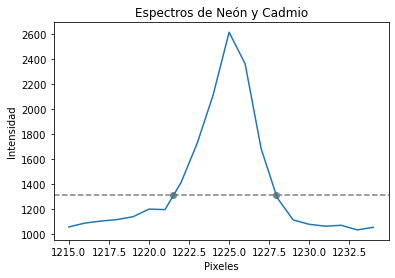

In [296]:
plt.axhline(2618/2, linestyle = "--", color = "grey")
plt.plot(axis[1215:1235], NeCd[1215:1235])
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title("Espectros de Neón y Cadmio")
plt.scatter([1221.5,1227.9],[2618/2,2618/2],color="grey")
Cd_line/(factor*3)

In [253]:
max_Cd = Search4Max(Neon_Cadmium,NeCd[600:])
max_Ne = Search4Max(Neon_Cadmium,NeCd[0:600])
x, y = [max_Ne, max_Cd], [Ne_line, Cd_line]

2.9787828947368546e-12

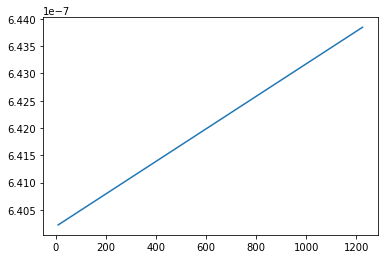

In [254]:
plt.plot(x, y)
factor, weight = build_line(x, y)
factor

In [255]:
pi = transform(x, y, px_pi)
sigma1 = transform(x, y, px_sigma1)
sigma2 = transform(x, y, px_sigma2)
l = [sigma1, pi, sigma2]
l

[6.438321060855264e-07, 6.43847e-07, 6.438648726973685e-07]

In [256]:
h = constants.h
c = constants.c
mub = (constants.e*constants.hbar)/(2*constants.electron_mass)

E_1 = (h*c)/Cd_line
E_1

3.0852762490916764e-19

In [257]:
distance = factor*(np.abs(px_pi - px_sigma1) + np.abs(px_pi - px_sigma2))/2 # Esta cosa está en Angstroms si le quitas el e-10.
distance

1.63833059210527e-11

In [258]:
B = distance/Cd_line**2 * (h*c)/mub
B

0.8465358537967054

In [259]:
E = (np.abs((h*c)/pi - (h*c)/(sigma1)) + np.abs((h*c)/pi - (h*c)/(sigma2)))/2 # Cambio general de energía usando la media de energías.
E

7.850745723084041e-24

In [260]:
mub*B # Cambio general de energías usando el campo magnético.

7.850782039805565e-24

In [261]:
Energy = []

for i in l:
    Energy.append((h*c)/i)
    
Energy

[3.085347621488528e-19, 3.0852762490916764e-19, 3.0851906065740665e-19]

In [262]:
inc_m = np.abs(factor*1)
inc_m

2.9787828947368546e-12

In [263]:
def GetPropagation(expr,vars,sigmas,measures):
    prop = 0
    for i in range(len(measures)):
        prop += expr.diff(var[i])**2 * sigmas[i]**2
    
    sigma = sym.sqrt(prop)
    #Sección para soltar el valor calculado y la incertidumbre del valor calculado. 

    sigma = sym.lambdify(var,sigma)
    mean = sym.lambdify(var,exp)
    return mean(*measures),sigma(*measures)

def New_Inc(inc1, inc2):
    return np.sqrt(inc1**2 + inc2**2)

In [264]:
vars = "lambda"
var = sym.symbols(vars)
var = np.array([var])

value_inc = np.array([])
sig = np.array([inc_m])
exp = (h*c)/var[0]
inc = np.array([])

for i in range(len(l)):
    mea = np.array([l[i]])
    data = GetPropagation(exp,var,sig,mea)
    value_inc = np.append(value_inc, data[0])
    inc = np.append(inc, data[1])

In [265]:
value_inc, inc

(array([3.08534762e-19, 3.08527625e-19, 3.08519061e-19]),
 array([1.42748096e-24, 1.42741492e-24, 1.42733567e-24]))

In [266]:
distance_ = (np.abs(l[1] - l[0]) + np.abs(l[1] - l[2]))/2 # Esta cosa está en Angstroms si le quitas el e-10.
incert = New_Inc(New_Inc(inc_m, inc_m), New_Inc(inc_m, inc_m))
distance_, incert

(1.638330592106772e-11, 5.957565789473708e-12)

In [267]:
exp = var[0]/Cd_line**2 * (h*c)/mub
sig = np.array([incert])
mea = np.array([distance_])
field, incertf = GetPropagation(exp,var,sig,mea)

In [268]:
exp = mub*var[0]
sig = np.array([incertf])
mea = np.array([field])
GetPropagation(exp,var,sig,mea)

(7.850782039812756e-24, 2.85482983265657e-24)

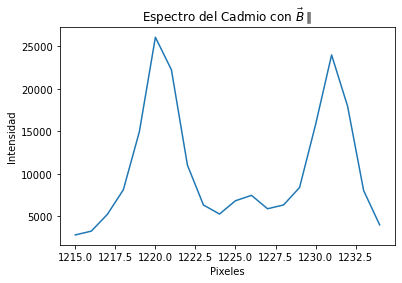

In [269]:
init, final = 1215, 1235
Cd_parallel = Cadmium_parallel["Gray_Value"].to_numpy()[init+110:final+110]
plt.plot(axis[init:final], Cd_parallel)
plt.xlabel("Pixeles")
plt.ylabel("Intensidad")
plt.title(r"Espectro del Cadmio con $\vec{B} \parallel$")
plt.savefig("Cadmio_Paral.pdf")